# Data cleaning.

## Import the libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

## Load the data.

In [2]:
raw_df = pd.read_csv('C:/Users/samru/Documents/Coding/data_analysis_projects/DataAnalysisProjects/CustomerChurnAnalysis/docs/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
raw_df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


We can see that TotalCharges column is object datatype. We'll have to convert it to float datatype.

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
raw_df["TotalCharges"] = pd.to_numeric(raw_df["TotalCharges"],errors='coerce')

After conversion to float, we see that Total charges has 11 null values. We'll drop these null values.

In [6]:
raw_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
raw_df.dropna(inplace=True)

In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


We see that columns like MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies have values like "No Phone Services" and "No internet service". Converting these values to "No" as they don't contribute to any meaningful categorization and converting to "No" won't affect their relation as well as analysis.

In [9]:
raw_df.value_counts('MultipleLines')
raw_df.value_counts('OnlineSecurity')
raw_df.value_counts('OnlineBackup')
raw_df.value_counts('DeviceProtection')
raw_df.value_counts('TechSupport')
raw_df.value_counts('StreamingTV')
raw_df.value_counts('StreamingMovies')

StreamingMovies
No                     2781
Yes                    2731
No internet service    1520
dtype: int64

In [10]:
raw_df['MultipleLines'].replace(to_replace="No phone service", value="No", inplace=True)
raw_df['OnlineSecurity'].replace(to_replace="No internet service", value="No", inplace=True)
raw_df['OnlineBackup'].replace(to_replace="No internet service", value="No", inplace=True)
raw_df['DeviceProtection'].replace(to_replace="No internet service", value="No", inplace=True)
raw_df['TechSupport'].replace(to_replace="No internet service", value="No", inplace=True)
raw_df['StreamingTV'].replace(to_replace="No internet service", value="No", inplace=True)
raw_df['StreamingMovies'].replace(to_replace="No internet service", value="No", inplace=True)

Removing the customer_id column as it serves no purpose for the customer churn analysis.

In [11]:
new_df = raw_df.iloc[:,1:]

We can also notice that the for many rows, the (monthly charges * tenure) is not equal to total charges. Let's dive into. 

In [12]:
new_df['calculatedCharges'] = new_df['tenure']*new_df['MonthlyCharges']

In [13]:
#define conditions
conditions =[new_df['TotalCharges'] > new_df['calculatedCharges'], new_df['TotalCharges'] < new_df['calculatedCharges']]

#define choices
choices = ['greater', 'lesser']

new_df['TotalChargesStatus'] = np.select(conditions, choices, default='equal')
new_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,calculatedCharges,TotalChargesStatus
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85,equal
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,1936.30,lesser
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,107.70,greater
3,Male,0,No,No,45,No,No,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1903.50,lesser
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,141.40,greater
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,2035.20,lesser
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,7430.40,lesser
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,325.60,greater
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,297.60,greater


Here we can see that the total charges are not exactly computed as (tenure X Monthly charges) in the dataset. As per our calculations, we can see that only 614 transactions are equal to the above logic, the rest of the transactions are either greater or lesser in value. This means that the telco company has provided discounts for 3214 transactions and charged more(payment delay fines, or other value add charges) to 3204 transactions.

This seems deliberate and hence we won't be making any new changes to the TotalCharges column and leave it as is in the dataset. No data cleaning will be applied for this.

In [14]:
new_df.value_counts('TotalChargesStatus')

TotalChargesStatus
lesser     3214
greater    3204
equal       614
dtype: int64

In [15]:
new_df.drop(new_df.columns[[-1,-2]], axis=1, inplace=True)
new_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [16]:
#Convertin the predictor variable in a binary numeric variable. This is helpful if we are to build a model to predict churn.
new_df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
new_df['Churn'].replace(to_replace='No',  value=0, inplace=True)
clean_df = new_df
clean_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [17]:
#Exporting the clean_df.
clean_df.to_csv(r'C:\Users\samru\Documents\Coding\data_analysis_projects\DataAnalysisProjects\CustomerChurnAnalysis\docs\cleaned_dataset\cage_telco_customer_churn_clean.csv', index=False, header=True)

# Data Exploration.

In [18]:
#Let's convert all the categorical variables into dummy variables to find the correlation.
df_dummies = pd.get_dummies(clean_df)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


We can see factors like month-to-month contract, Fiber-optic internet service, payment-method electronic_check, monthly charges, paperlessBilling_yes, online security_no, no tech support, senior citizens, etc are positively correlated with churn, which means that with increase in these factors, higher churn.

Factors like tenure, two year contract, TotalCharges, OnlineSecurity_yes and TechSupport_yes have negative correlation.

<AxesSubplot:>

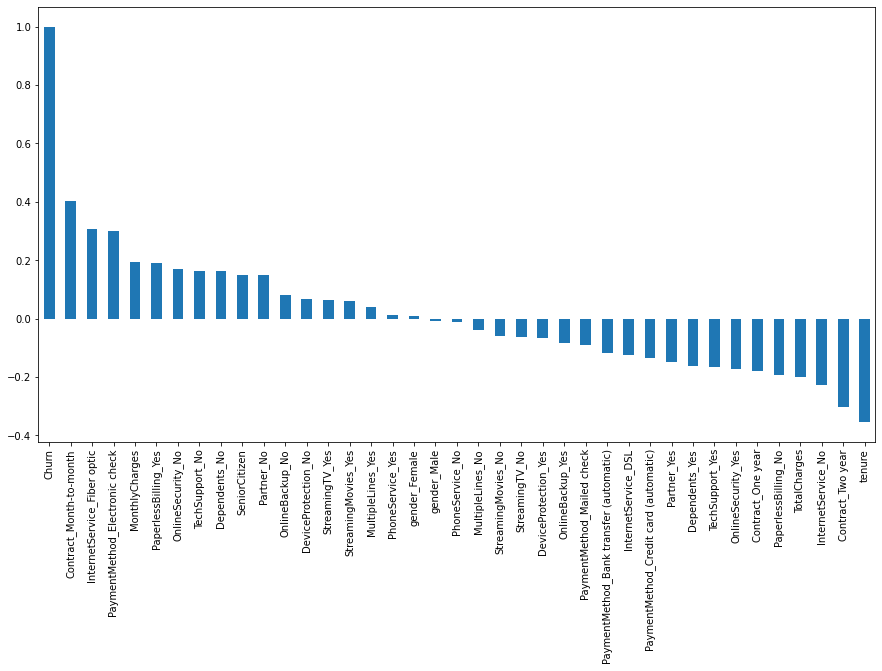

In [19]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

## Explore demographics

Let us first understand the gender, age range, patner and dependent status of the customers

### Gender

We can see the genders are balanced, both male and female customers make about 50% each in the dataset. Gender also doesn't have much affect on churn as seen in the correlation chart.

<AxesSubplot:title={'center':'Gender distribution in percentage(%)'}, xlabel='Gender', ylabel='% Customers'>

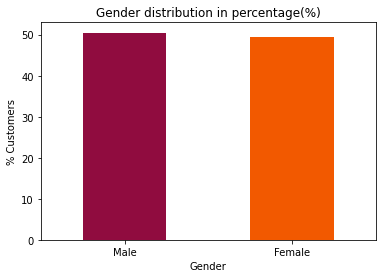

In [20]:
colors = ['#900C3F', '#F25900']
clean_df.gender.value_counts(normalize=True).mul(100).plot(xlabel="Gender", ylabel="% Customers", kind="bar", rot=0, title="Gender distribution in percentage(%)", color=colors)

Distribution of SeniorCitizen in the dataset. About 84% of customers are not senior citizens. Many young people in the dataset.

SeniorCitizen has a positive correlation with churn.

<AxesSubplot:ylabel='SeniorCitizen'>

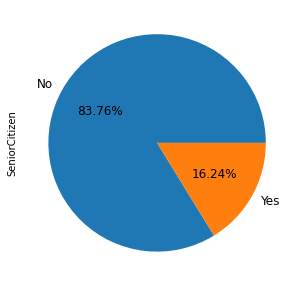

In [21]:
clean_df.SeniorCitizen.value_counts(normalize=True).mul(100).plot.pie(autopct='%.2f%%', labels=['No', 'Yes'], figsize=(5,5), fontsize=12)

Distribution of gender amongst the senior citizens is 50-50% male to female. Similar distibution for non-senior citizen customers too.

SeniorCitizen  gender
0              Female    2915
               Male      2975
1              Female     568
               Male       574
Name: gender, dtype: int64

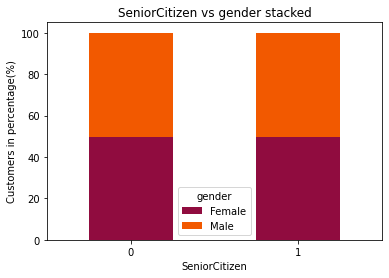

In [22]:
colors = ['#900C3F', '#F25900']
# clean_df.groupby(['SeniorCitizen', 'gender']).size().unstack().plot(kind="bar", stacked=True, rot=0, color = colors)
# clean_df.groupby(['SeniorCitizen', 'gender']).size().unstack()

temp_one = clean_df.groupby('SeniorCitizen')['gender'].value_counts(normalize=True, sort=False).mul(100).round(2)
temp_one.unstack().plot(ylabel="Customers in percentage(%)",kind="bar", stacked=True, rot=0, color=colors, title="SeniorCitizen vs gender stacked")
clean_df.groupby('SeniorCitizen')['gender'].value_counts(normalize=False, sort=False)

### Partner

We can see that about 50% of customers have dependents.

In [23]:
clean_df.Partner.value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

### Dependents

Around 70% of the customers do not have dependents. The Dependents_No does have a positive correlation with churn which has to be explored during churn analysis.

<AxesSubplot:title={'center':'Dependents distribution in percentage(%)'}, xlabel='Dependents', ylabel='Customers in percentage(%)'>

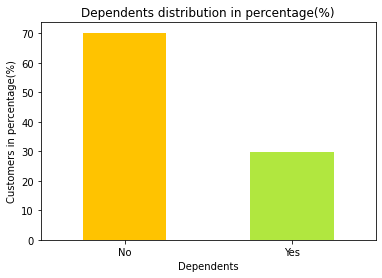

In [24]:
colors = ['#FFC300', '#B1E73F']
clean_df.Dependents.value_counts(normalize=True).mul(100).round(2).plot(xlabel="Dependents", ylabel="Customers in percentage(%)", kind="bar", rot=0, title="Dependents distribution in percentage(%)", color=colors)

Partner  Dependents
No       No            3280
         Yes            359
Yes      No            1653
         Yes           1740
Name: Dependents, dtype: int64

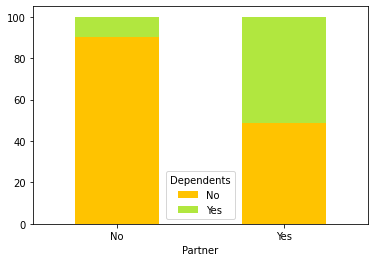

In [25]:
colors = ['#FFC300', '#B1E73F']
temp_one = clean_df.groupby('Partner')['Dependents'].value_counts(normalize=True, sort=False).mul(100).round(2)
temp_one.unstack().plot(kind="bar", stacked=True, rot=0, color=colors)
clean_df.groupby('Partner')['Dependents'].value_counts(normalize=False, sort=False)

## Explore Customer Account details.

Let us look into tenure and contract types and their relation with each other.

### Tenure

Majority of the customers have tenure less than 1-3 months as seen on the hist plot. The second peak shows us that customers who are loyal or long time have stayed with the telco company for more that 70 months. This distribution has two peaks.

Text(0.5, 1.0, '# of customers according to the tenure')

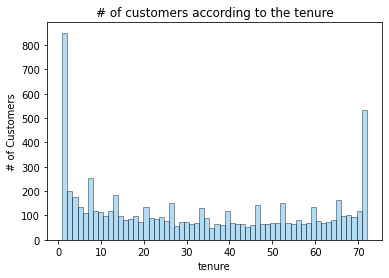

In [26]:
ax = sb.distplot(clean_df['tenure'], hist=True, kde=False, bins=60, color='#3FA5E7', hist_kws={'edgecolor':'black'})
ax.set_ylabel("# of Customers")
ax.set_title("# of customers according to the tenure")

### Contract types.

Majority of the customers have taken the month-to-month contracts. The two-year and one-year contracts have almost the same no. of takers.

<AxesSubplot:title={'center':'# No of customers vs contract'}, ylabel='# of customers'>

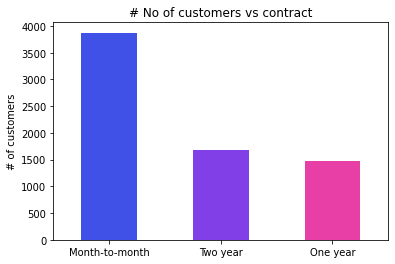

In [27]:
colors=['#3F51E7', '#813FE7', '#E73FA5']
clean_df.Contract.value_counts().plot(kind="bar", rot=0, ylabel="# of customers", title="# No of customers vs contract", color=colors)

Let's see how each contract type performs in the given tenure.

Most of the month-to-month contracts last for 1-2 months and the two-year contracts, huge number of them last 70+ months. This indicates that long term(two-year, one-year) contracts customers are more loyal and less likely to churn compared to the monthly contract customers.

Text(0.5, 1.0, 'Two Year Contract')

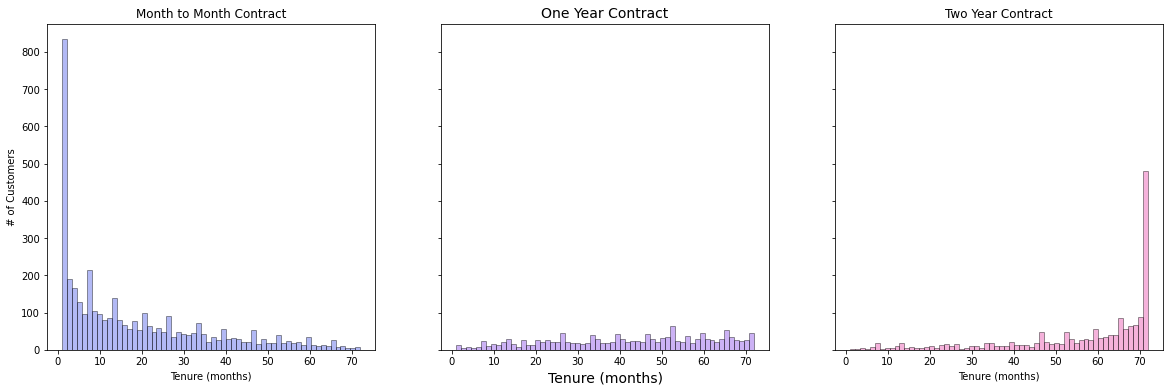

In [28]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sb.distplot(clean_df[clean_df['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=60, color = '#3F51E7',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sb.distplot(clean_df[clean_df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=60, color = '#813FE7',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sb.distplot(clean_df[clean_df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=60, color = '#E73FA5',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

## Explore Services provided by the telco company

Some of these services have a positive correlation with churn and that will be explored during churn analysis.

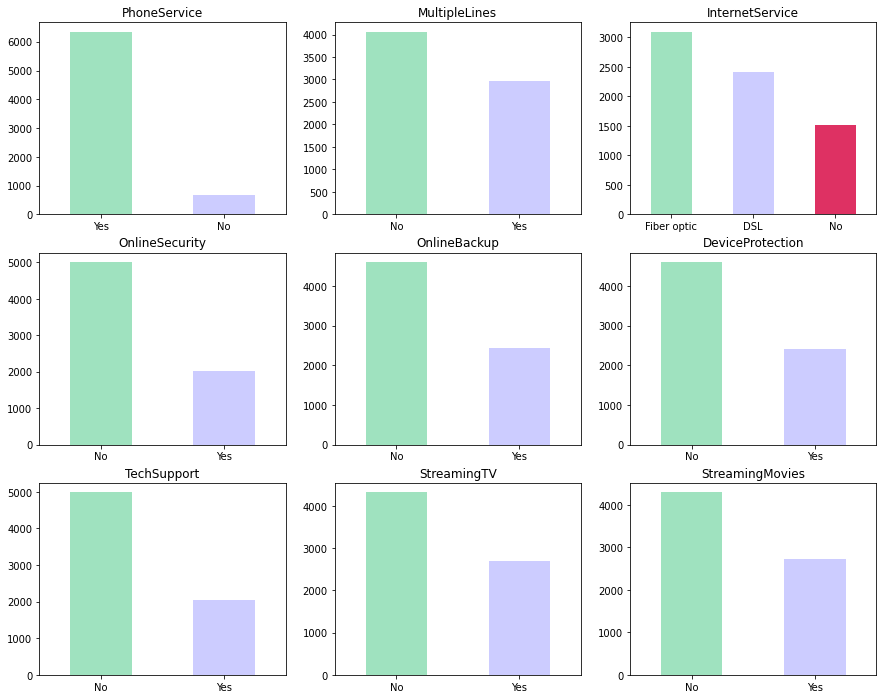

In [34]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
colors=['#9FE2BF', '#CCCCFF', '#DE3163']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = clean_df[item].value_counts().plot(kind = 'bar',ax=axes[0,i],rot = 0, color=colors)
        
    elif i >=3 and i < 6:
        ax = clean_df[item].value_counts().plot(kind = 'bar',ax=axes[1,i-3],rot = 0, color=colors)
        
    elif i < 9:
        ax = clean_df[item].value_counts().plot(kind = 'bar',ax=axes[2,i-6],rot = 0, color=colors)
    ax.set_title(item)

### Monthly and totalcharges and their relation

As monthly charge increase, we see an increase in total charge too.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

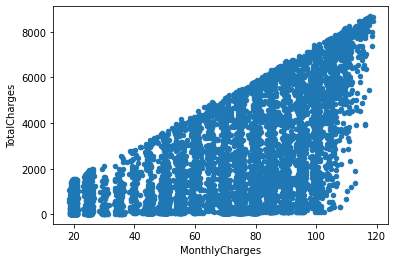

In [38]:
clean_df[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',y='TotalCharges')

# Churn Analysis